In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from scipy.stats import zscore


import warnings
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_excel(r"C:\Users\Harshit Gupta\Downloads\Customer_retention_dataset-\customer_retention_dataset.xlsx")
df

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Female,21-30 years,Solan,173212,1-2 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,Android,...,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in
265,Female,31-40 years,Ghaziabad,201008,1-2 years,31-40 times,Mobile Internet,Smartphone,Others,Android,...,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com
266,Female,41-50 yaers,Bangalore,560010,2-3 years,Less than 10 times,Mobile internet,Laptop,Others,Window/windows Mobile,...,Amazon.in,Snapdeal.com,Amazon.in,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Amazon.in
267,Female,Less than 20 years,Solan,173229,2-3 years,Less than 10 times,Wi-Fi,Smartphone,5.5 inches,Android,...,Amazon.in,"Amazon.in, Myntra.com, Snapdeal.com",Amazon.in,"Amazon.in, Snapdeal.com",Amazon.in,Amazon.in,Amazon.in,"Myntra.com, Snapdeal.com","Myntra.com, Snapdeal.com",Amazon.in


In [12]:
df.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


In [13]:
df.shape

(269, 71)

In [14]:
df.dtypes

1Gender of respondent                                                   object
2 How old are you?                                                      object
3 Which city do you shop online from?                                   object
4 What is the Pin Code of where you shop online from?                    int64
5 Since How Long You are Shopping Online ?                              object
                                                                         ...  
Longer delivery period                                                  object
Change in website/Application design                                    object
Frequent disruption when moving from one page to another                object
Website is as efficient as before                                       object
Which of the Indian online retailer would you recommend to a friend?    object
Length: 71, dtype: object

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                          --------------  ----- 
 0   1Gender of respondent                                                                                                                                                                                           269 non-null    object
 1   2 How old are you?                                                                                                                                                                    

In [16]:
df.isnull().sum()


1Gender of respondent                                                   0
2 How old are you?                                                      0
3 Which city do you shop online from?                                   0
4 What is the Pin Code of where you shop online from?                   0
5 Since How Long You are Shopping Online ?                              0
                                                                       ..
Longer delivery period                                                  0
Change in website/Application design                                    0
Frequent disruption when moving from one page to another                0
Website is as efficient as before                                       0
Which of the Indian online retailer would you recommend to a friend?    0
Length: 71, dtype: int64

In [17]:
df.describe()


,4 What is the Pin Code of where you shop online from?
count,269.000000
mean,220465.747212
std,140524.341051
min,110008.000000
25%,122018.000000
50%,201303.000000
75%,201310.000000
max,560037.000000


In [18]:
df.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [19]:
df.isnull().values.any()

False

<AxesSubplot:>

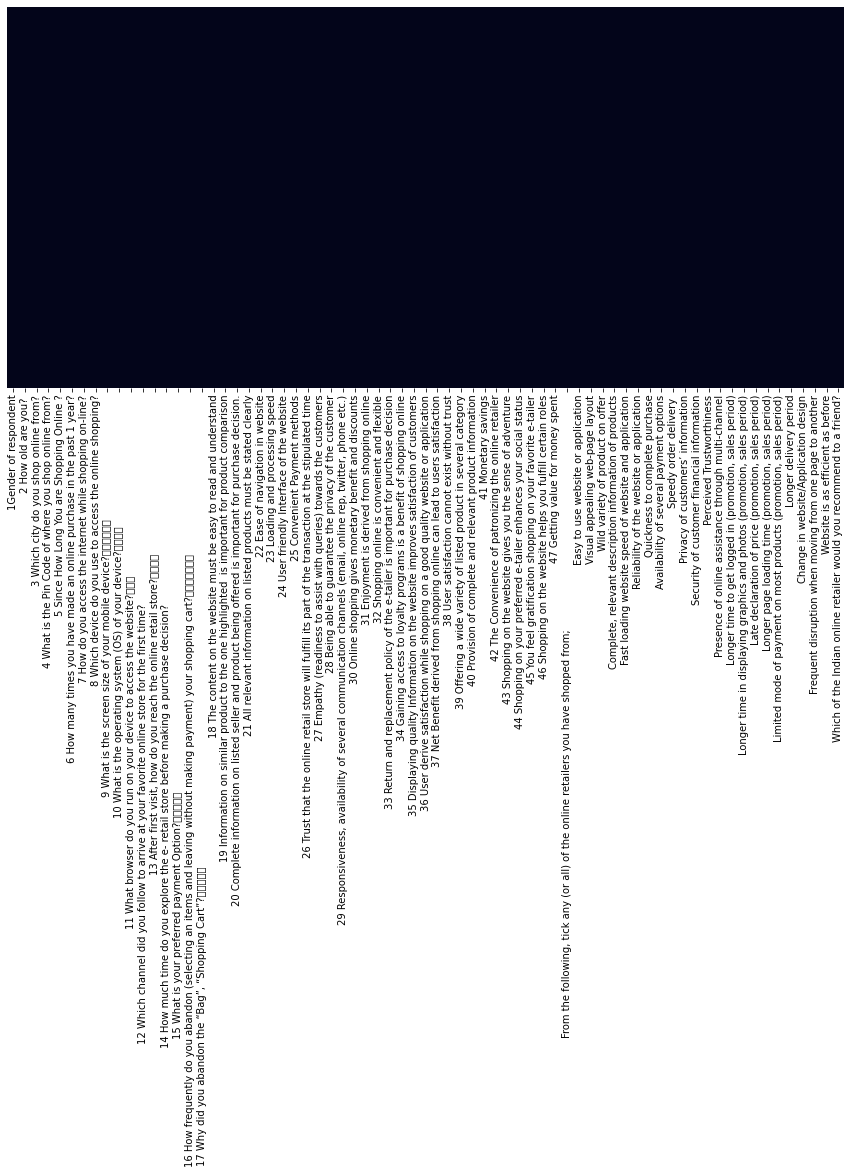

In [23]:
plt.figure(figsize=(15,7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

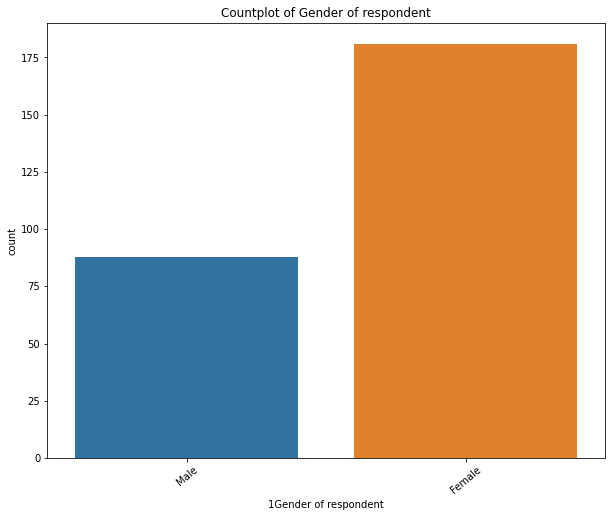

Female    181
Male       88
Name: 1Gender of respondent, dtype: int64

In [24]:
plt.subplots(figsize=(10,8))
sns.countplot(x="1Gender of respondent", data=df)
plt.title("Countplot of Gender of respondent")
plt.xticks(rotation=40)
plt.xlabel('1Gender of respondent')
plt.ylabel("count")
plt.show()

df['1Gender of respondent'].value_counts()


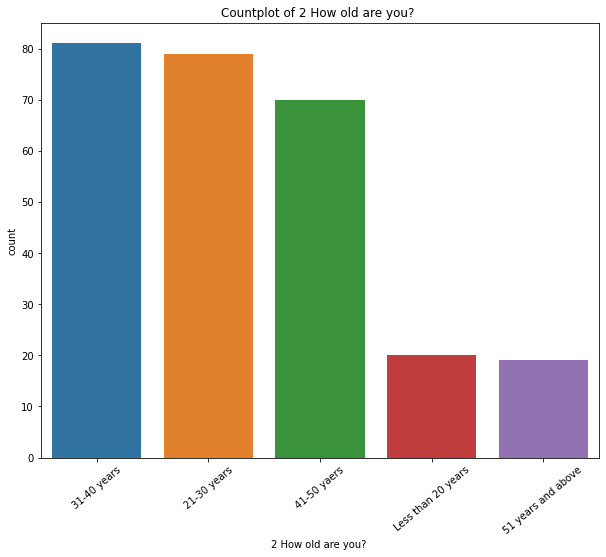

31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: 2 How old are you? , dtype: int64

In [25]:
plt.subplots(figsize=(10,8))
sns.countplot(x="2 How old are you? ", data=df)
plt.title("Countplot of 2 How old are you? ")
plt.xticks(rotation=40)
plt.xlabel('2 How old are you? ')
plt.ylabel("count")
plt.show()

df['2 How old are you? '].value_counts()

# Observation:
Majority, 81 of the customers are from age group 31-40 years.

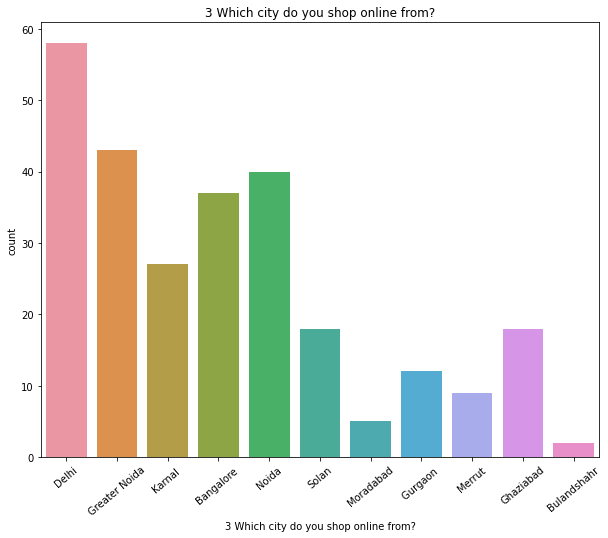

Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Solan            18
Ghaziabad        18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: 3 Which city do you shop online from?, dtype: int64

In [27]:
plt.subplots(figsize=(10,8))
sns.countplot(x="3 Which city do you shop online from?", data=df)
plt.title("3 Which city do you shop online from?")
plt.xticks(rotation=40)
plt.xlabel('3 Which city do you shop online from?')
plt.ylabel("count")
plt.show()

df['3 Which city do you shop online from?'].value_counts()

# Observation:
Majority, 58 of the customers placed the order at Delhi city.

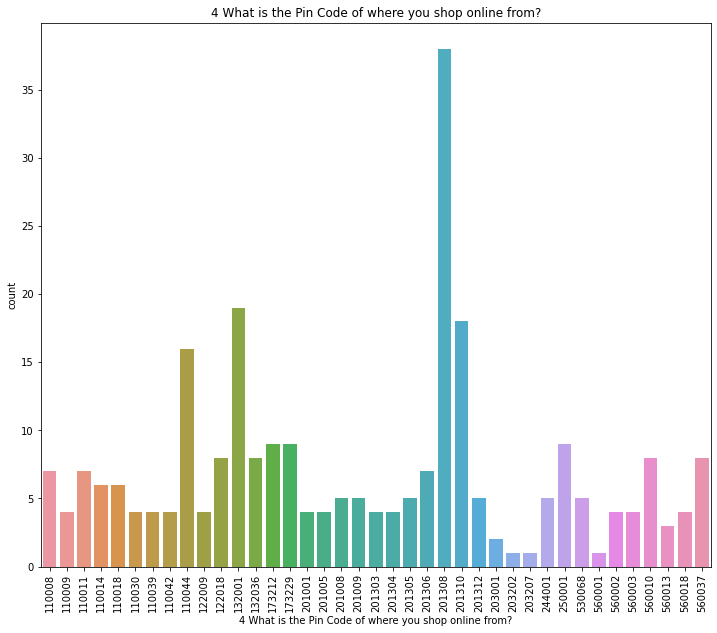

201308    38
132001    19
201310    18
110044    16
250001     9
173229     9
173212     9
560010     8
132036     8
122018     8
560037     8
110008     7
110011     7
201306     7
110014     6
110018     6
201305     5
201008     5
201009     5
201312     5
244001     5
530068     5
122009     4
201001     4
560003     4
201304     4
110009     4
201303     4
560002     4
560018     4
110042     4
110030     4
201005     4
110039     4
560013     3
203001     2
203202     1
560001     1
203207     1
Name: 4 What is the Pin Code of where you shop online from?, dtype: int64

In [28]:
plt.subplots(figsize=(12,10))
sns.countplot(x="4 What is the Pin Code of where you shop online from?", data=df)
plt.title("4 What is the Pin Code of where you shop online from?")
plt.xticks(rotation='vertical')
plt.xlabel('4 What is the Pin Code of where you shop online from?')
plt.ylabel("count")
plt.show()

df['4 What is the Pin Code of where you shop online from?'].value_counts()

# Observation:
Majority, 38 of the customers placed an order from the pincode 201308.

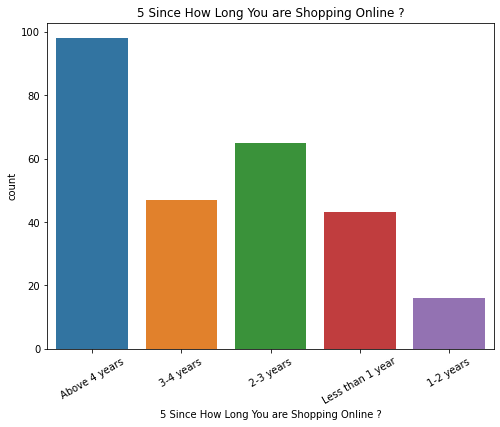

Above 4 years       98
2-3 years           65
3-4 years           47
Less than 1 year    43
1-2 years           16
Name: 5 Since How Long You are Shopping Online ?, dtype: int64

In [29]:
plt.subplots(figsize=(8,6))
sns.countplot(x="5 Since How Long You are Shopping Online ?", data=df)
plt.title("5 Since How Long You are Shopping Online ?")
plt.xticks(rotation=30)
plt.xlabel('5 Since How Long You are Shopping Online ?')
plt.ylabel("count")
plt.show()

df['5 Since How Long You are Shopping Online ?'].value_counts()

# Observation:
Majority, 98 customers are shopping since above 4 years.

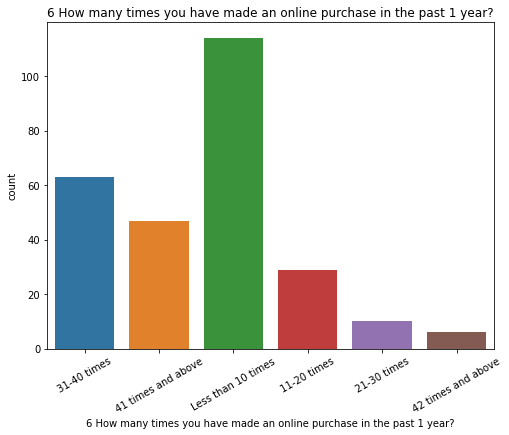

Less than 10 times    114
31-40 times            63
41 times and above     47
11-20 times            29
21-30 times            10
42 times and above      6
Name: 6 How many times you have made an online purchase in the past 1 year?, dtype: int64

In [30]:
plt.subplots(figsize=(8,6))
sns.countplot(x="6 How many times you have made an online purchase in the past 1 year?",data=df)
plt.title("6 How many times you have made an online purchase in the past 1 year?")
plt.xticks(rotation=30)
plt.xlabel('6 How many times you have made an online purchase in the past 1 year?')
plt.ylabel("count")
plt.show()

df['6 How many times you have made an online purchase in the past 1 year?'].value_counts()


# Observation:
Majority 114 of the customers have made less than 10 times online purchase in the past 1 year.

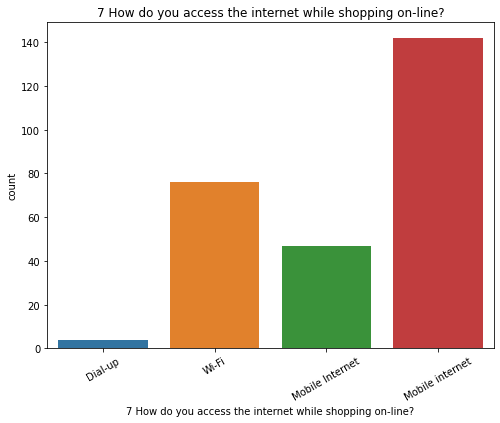

Mobile internet    142
Wi-Fi               76
Mobile Internet     47
Dial-up              4
Name: 7 How do you access the internet while shopping on-line?, dtype: int64

In [31]:
plt.subplots(figsize=(8,6))
sns.countplot(x="7 How do you access the internet while shopping on-line?", data=df)
plt.title("7 How do you access the internet while shopping on-line?")
plt.xticks(rotation=30)
plt.xlabel('7 How do you access the internet while shopping on-line?')
plt.ylabel("count")
plt.show()

df['7 How do you access the internet while shopping on-line?'].value_counts()

# Observation:
Majority, 189 customers use Mobile internet while shopping online.

Smartphone    141
Laptop         86
Desktop        30
Tablet         12
Name: 8 Which device do you use to access the online shopping?, dtype: int64

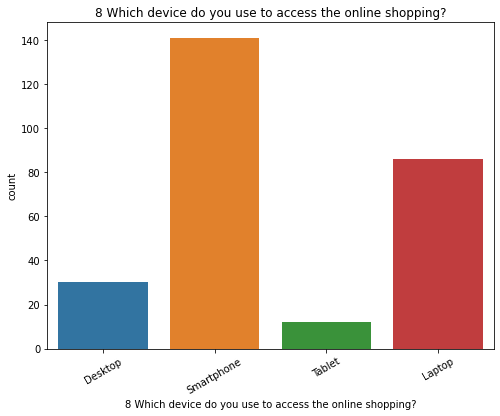

In [32]:
plt.subplots(figsize=(8,6))
sns.countplot(x="8 Which device do you use to access the online shopping?", data=df)
plt.title("8 Which device do you use to access the online shopping?")
plt.xticks(rotation=30)
plt.xlabel('8 Which device do you use to access the online shopping?')
plt.ylabel("count")
plt.show

df['8 Which device do you use to access the online shopping?'].value_counts()

# Observation:
Majority, 141 customers smartphone while shopping online.

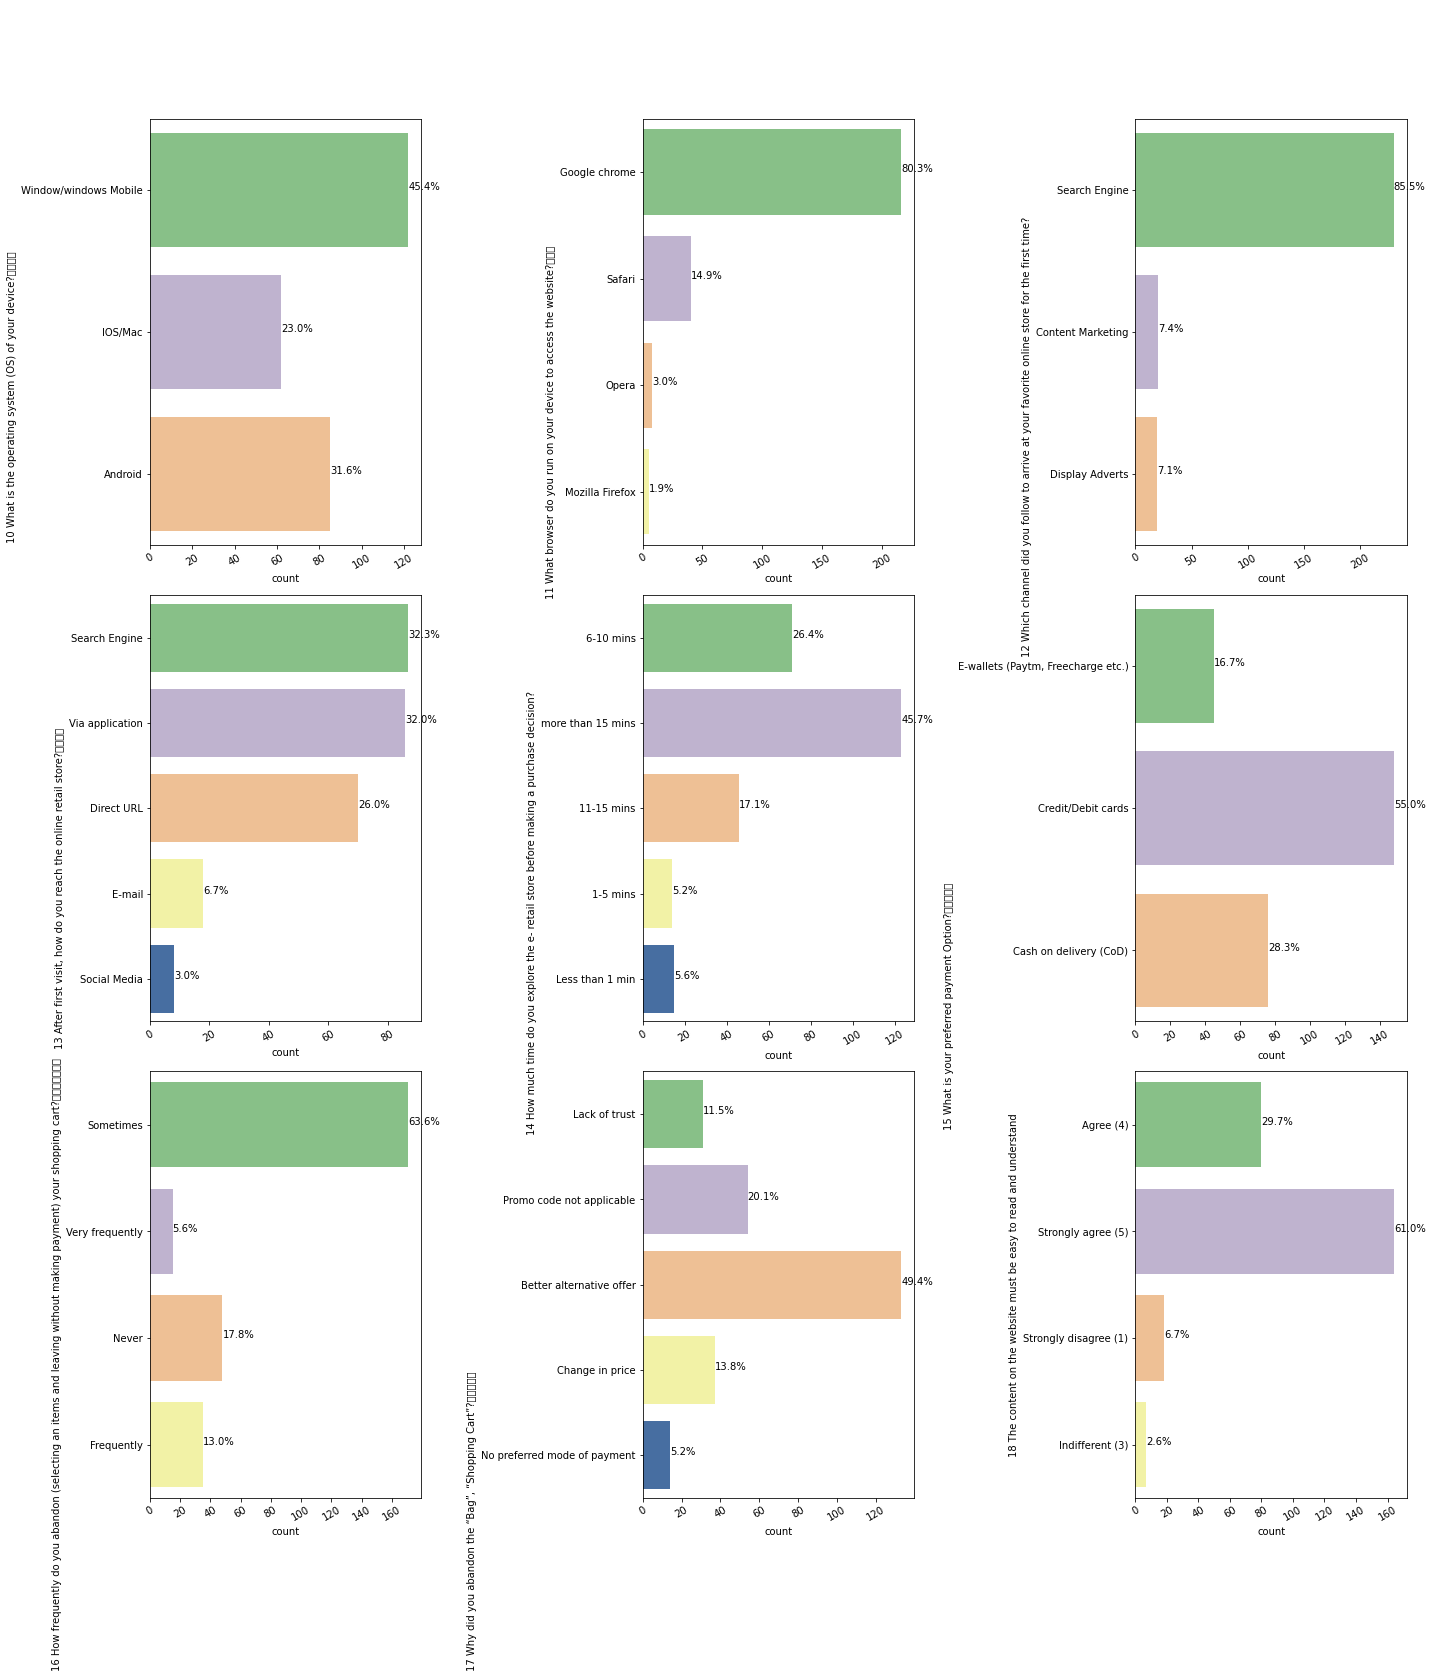

In [33]:
plt.figure(figsize=(20,20))
c=1
for i in df.columns[9:18]:
    plt.subplot(3,3,c)
    c=c+1
    ax = sns.countplot(y = df[i],palette='Accent')
    plt.xticks(rotation=30)
    
    
    total = len(df[i])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
        plt.tight_layout()

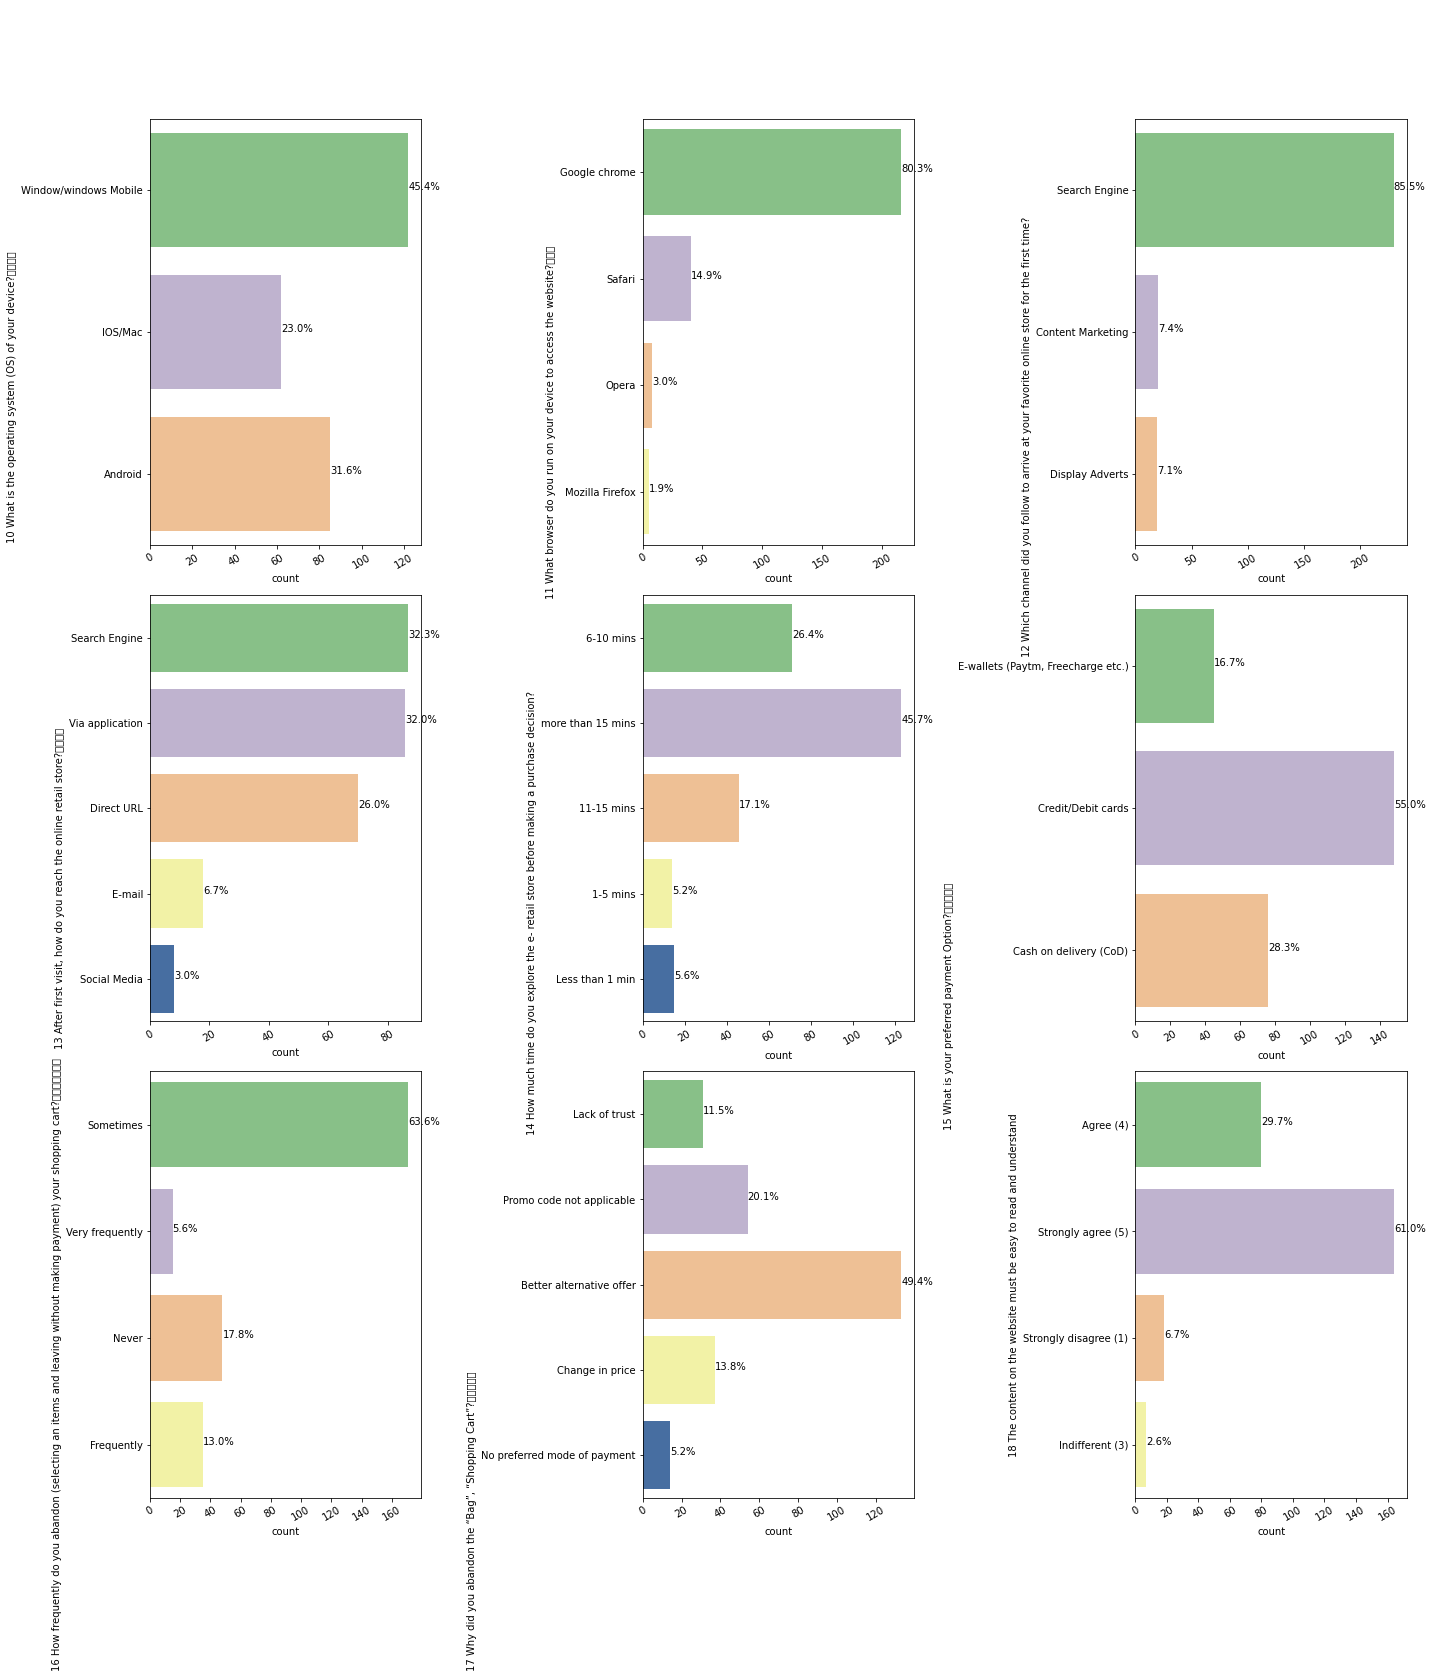

In [34]:
plt.figure(figsize=(20,20))
c=1
for i in df.columns[9:18]:
    plt.subplot(3,3,c)
    c=c+1
    ax = sns.countplot(y = df[i],palette='Accent')
    plt.xticks(rotation=30)
    
    
    total = len(df[i])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
        plt.tight_layout()

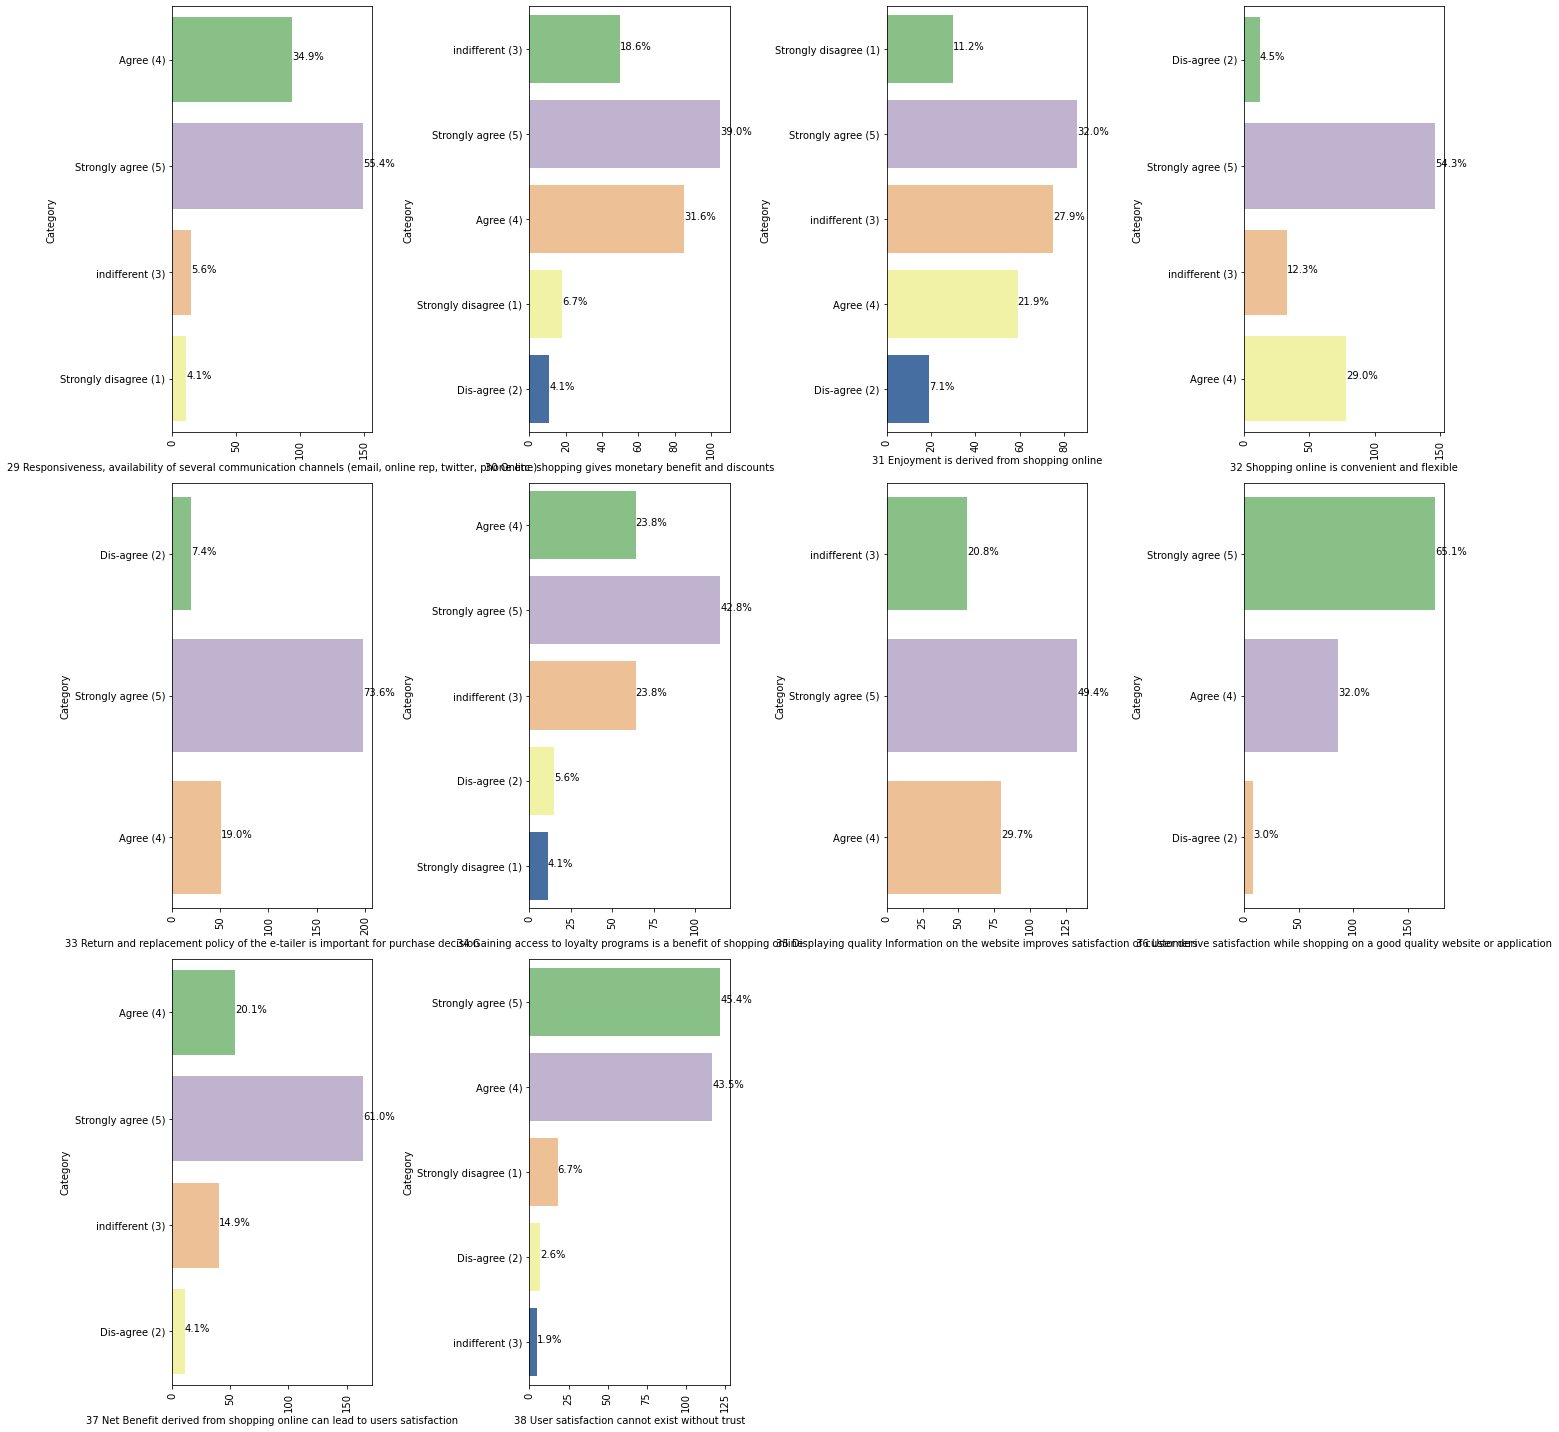

In [35]:
plt.figure(figsize=(20,20))
c=1
for i in df.columns[28:38]:
    plt.subplot(3,4,c)
    c=c+1
    ax = sns.countplot(y = df[i],palette='Accent')
    plt.xticks(rotation=90)
    plt.xlabel(i)
    plt.ylabel('Category')
    
    total = len(df[i])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
    
plt.tight_layout()


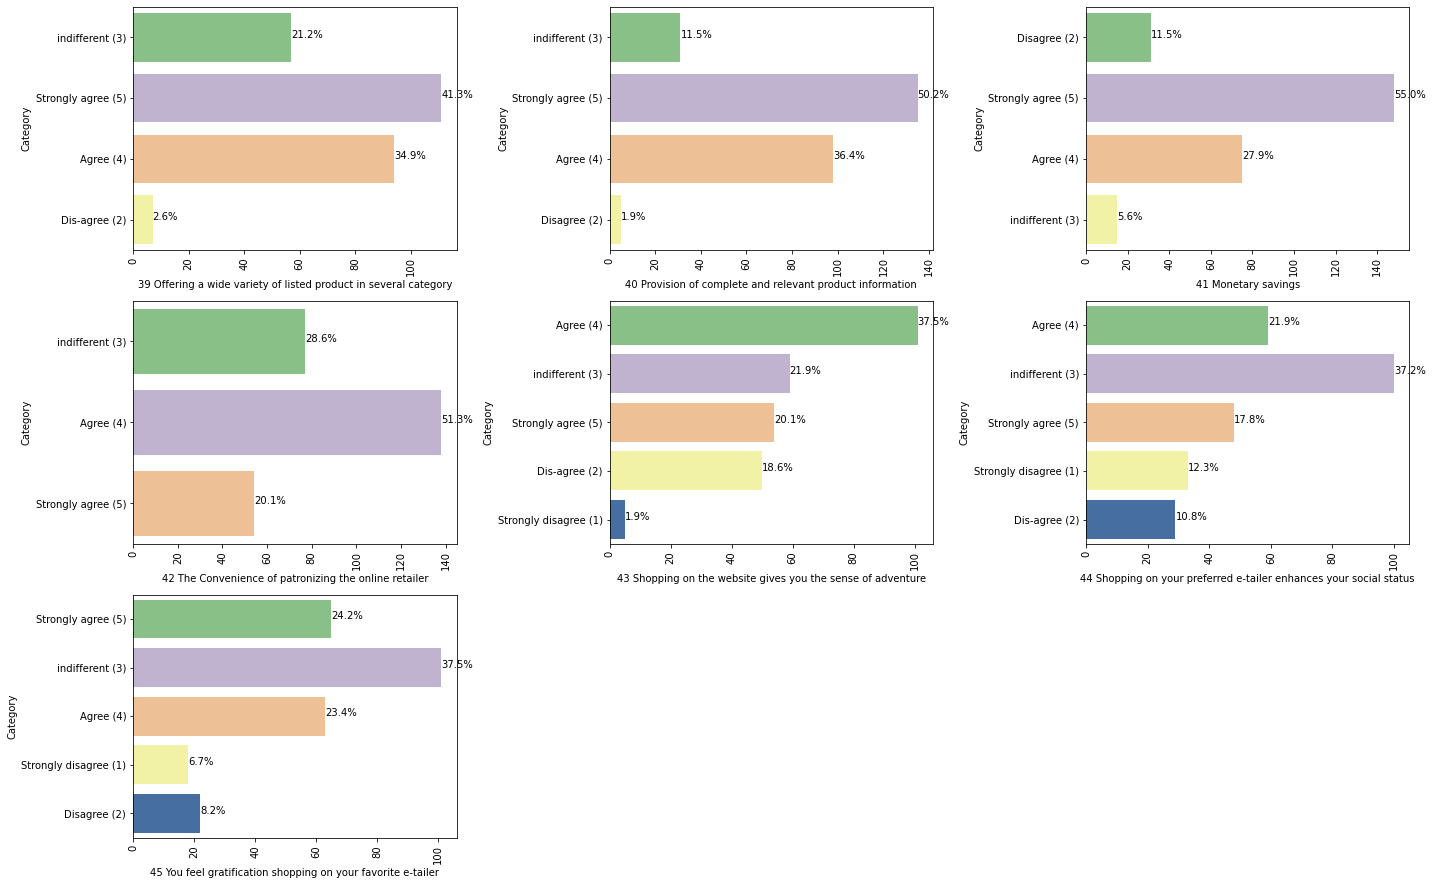

In [36]:
plt.figure(figsize=(20,20))
c=1
for i in df.columns[38:45]:
    plt.subplot(5,3,c)
    c=c+1
    ax = sns.countplot(y = df[i],palette='Accent')
    plt.xticks(rotation=90)
    plt.xlabel(i)
    plt.ylabel('Category')
    
    total = len(df[i])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
    
plt.tight_layout()

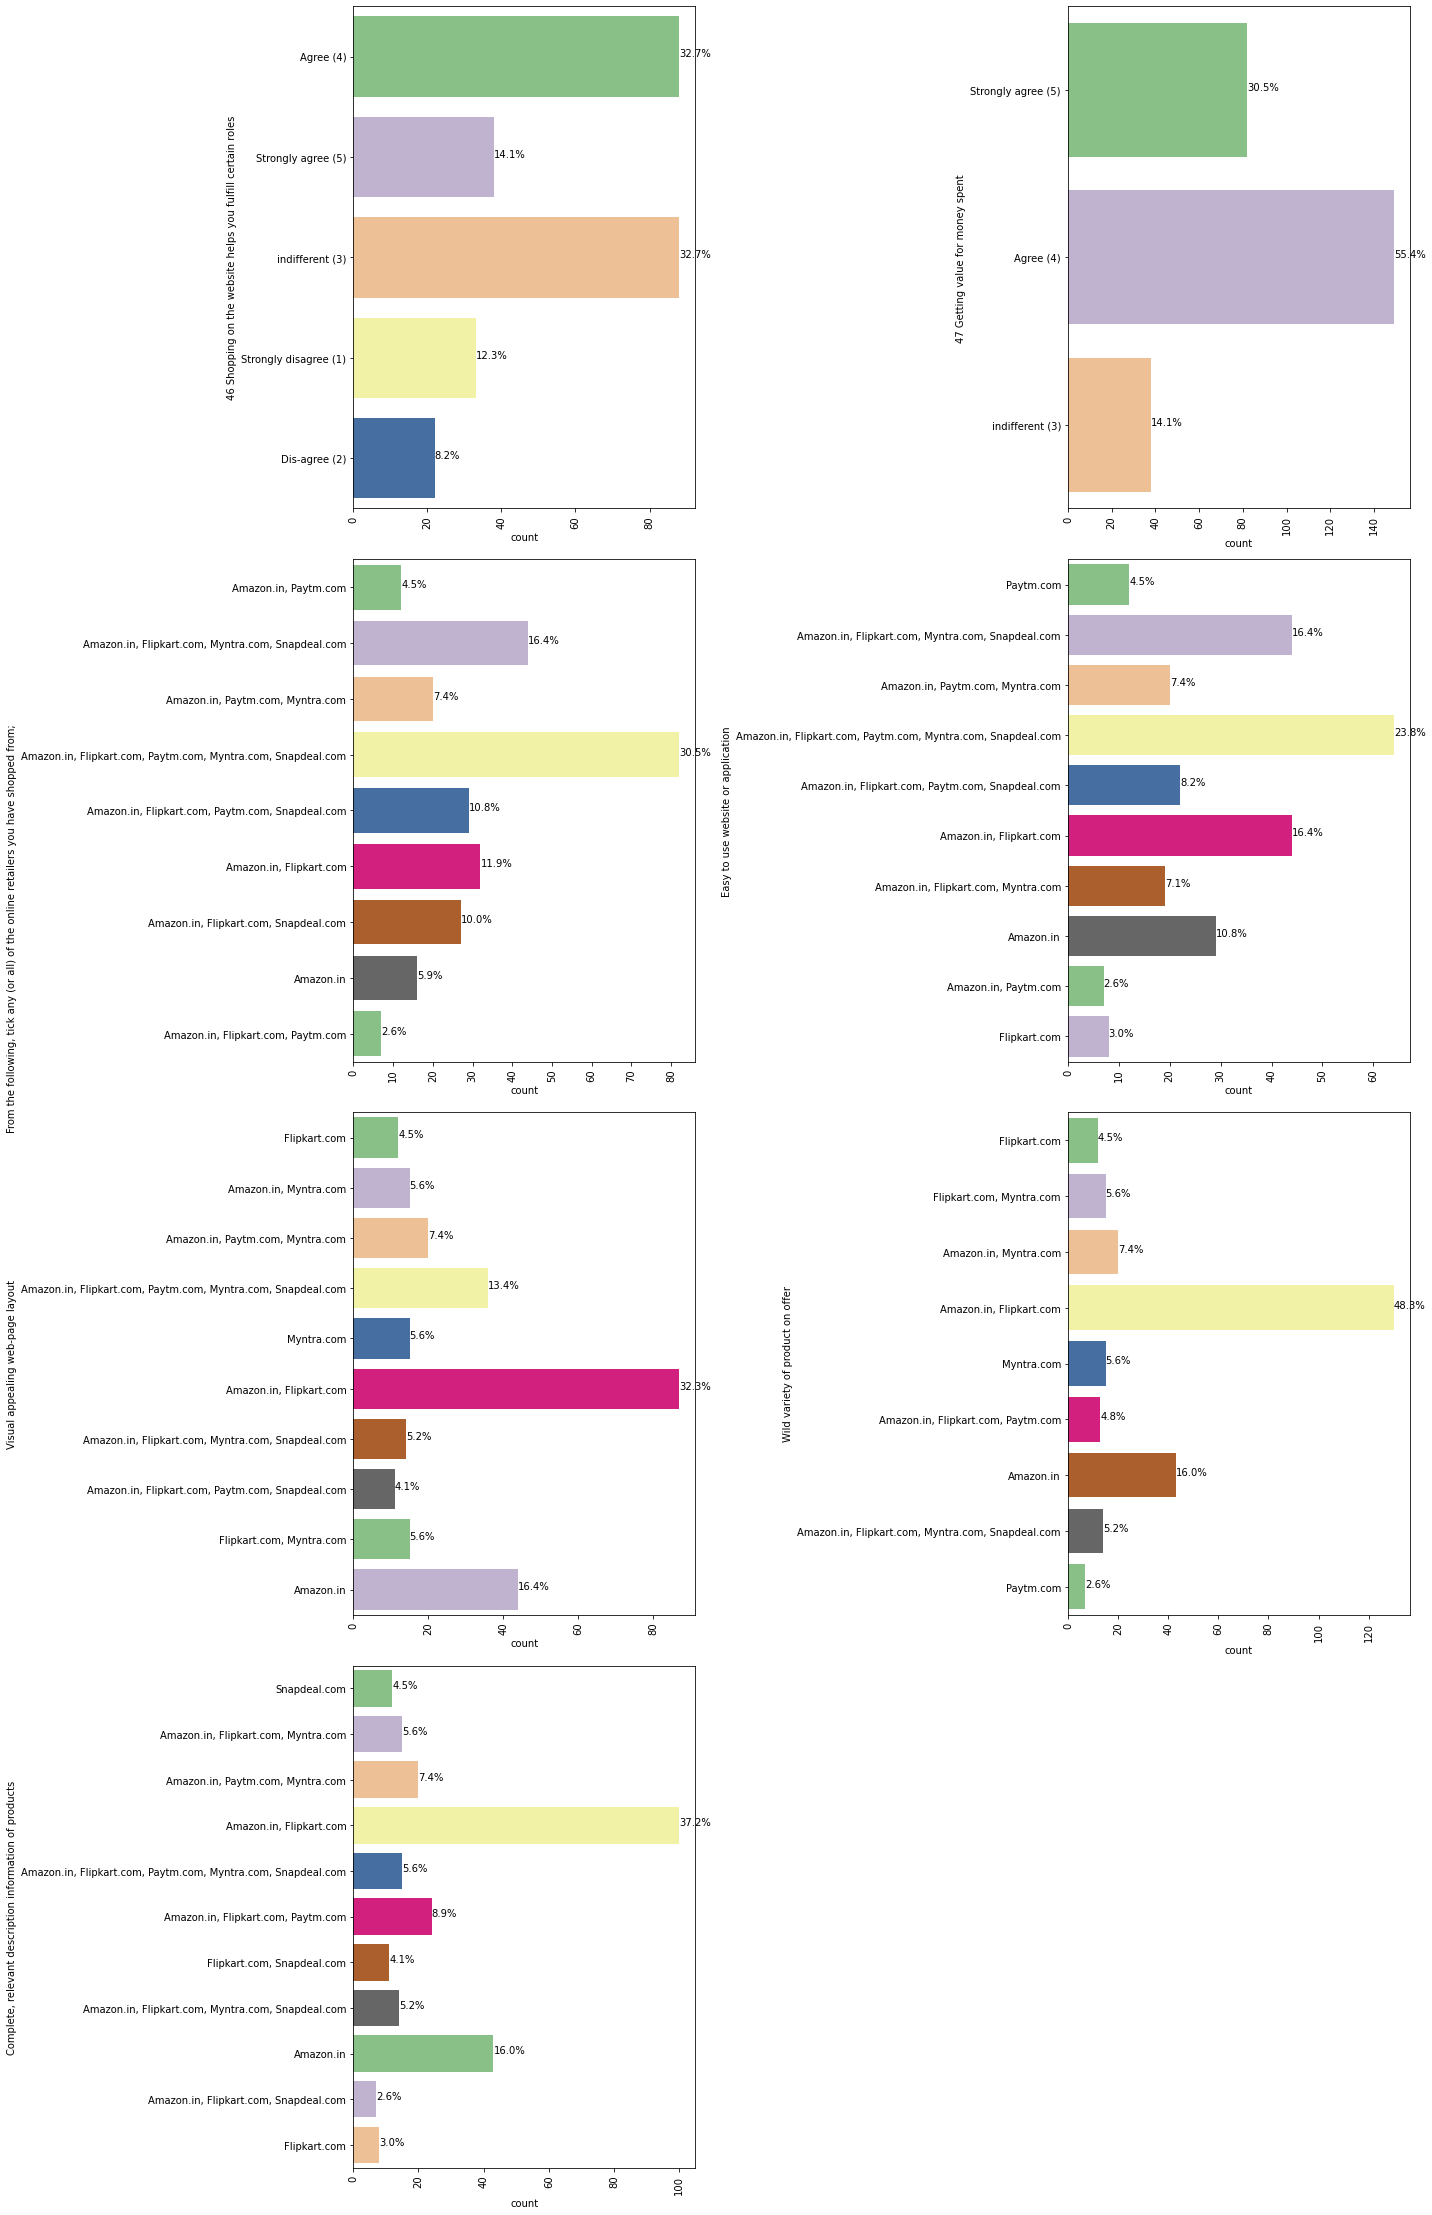

In [40]:
plt.figure(figsize=(20,38))
c=1
for i in df.columns[45:52]:
    plt.subplot(5,2,c)
    c=c+1
    ax = sns.countplot(y = df[i],palette='Accent')
    plt.xticks(rotation=90)
    
    
    total = len(df[i])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
        
        plt.tight_layout()

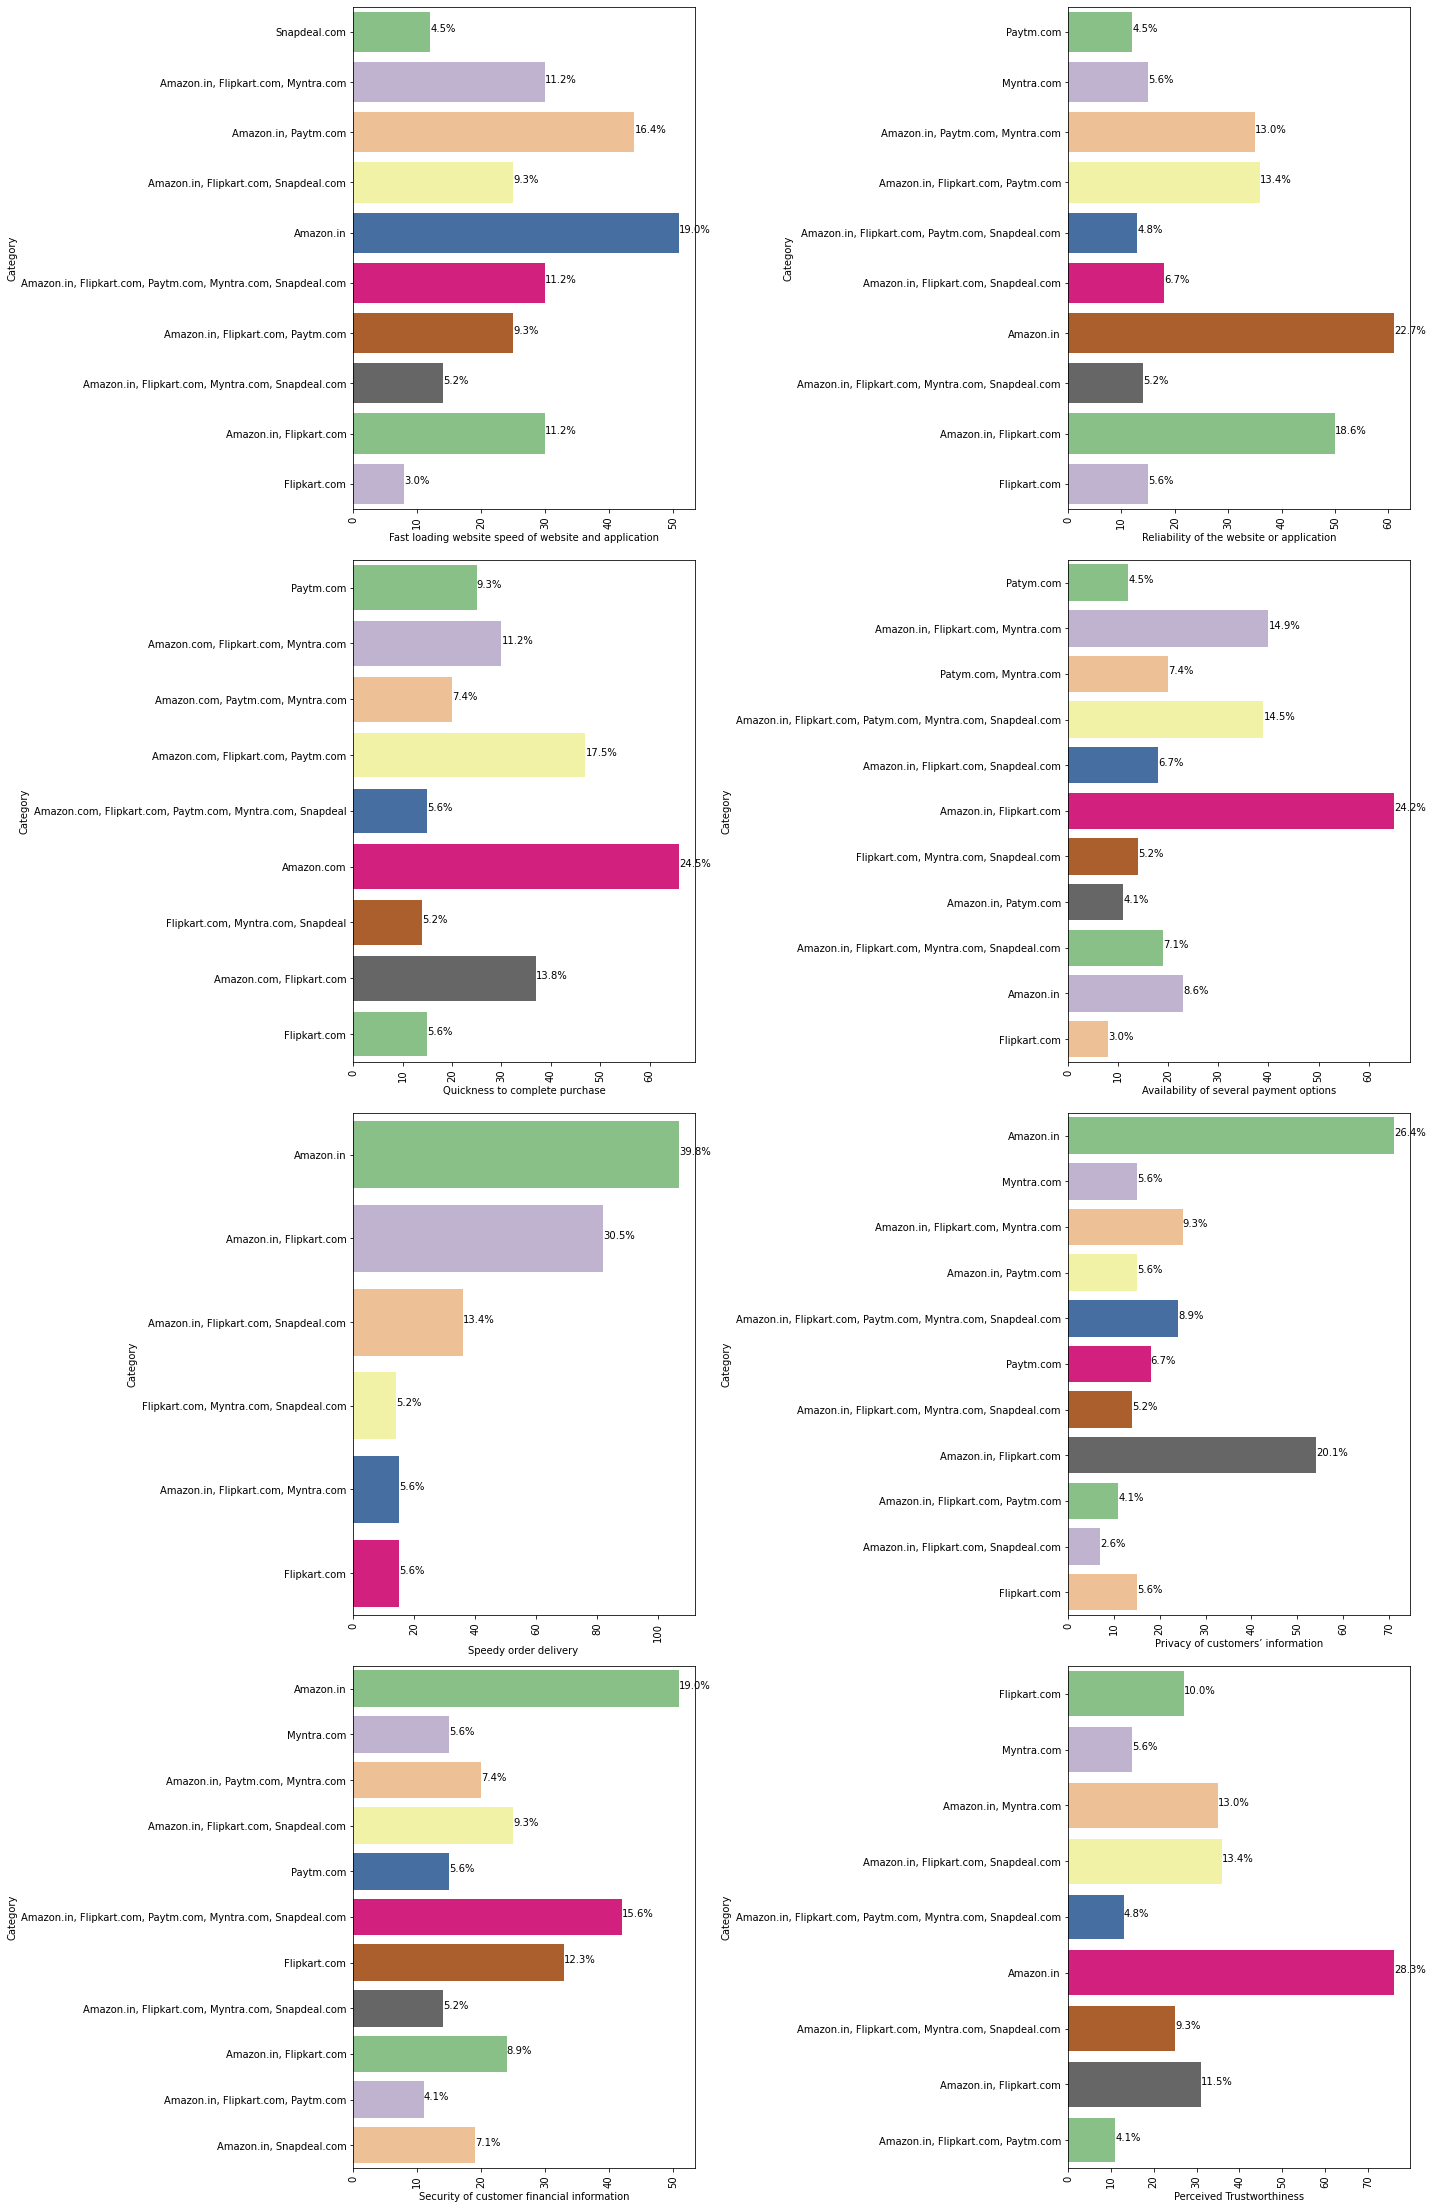

In [38]:
plt.figure(figsize=(20,38))
c=1
for i in df.columns[52:60]:
    plt.subplot(5,2,c)
    c=c+1
    ax = sns.countplot(y = df[i],palette='Accent')
    plt.xticks(rotation=90)
    plt.xlabel(i)
    plt.ylabel('Category')
    
    total = len(df[i])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
        
        plt.tight_layout()

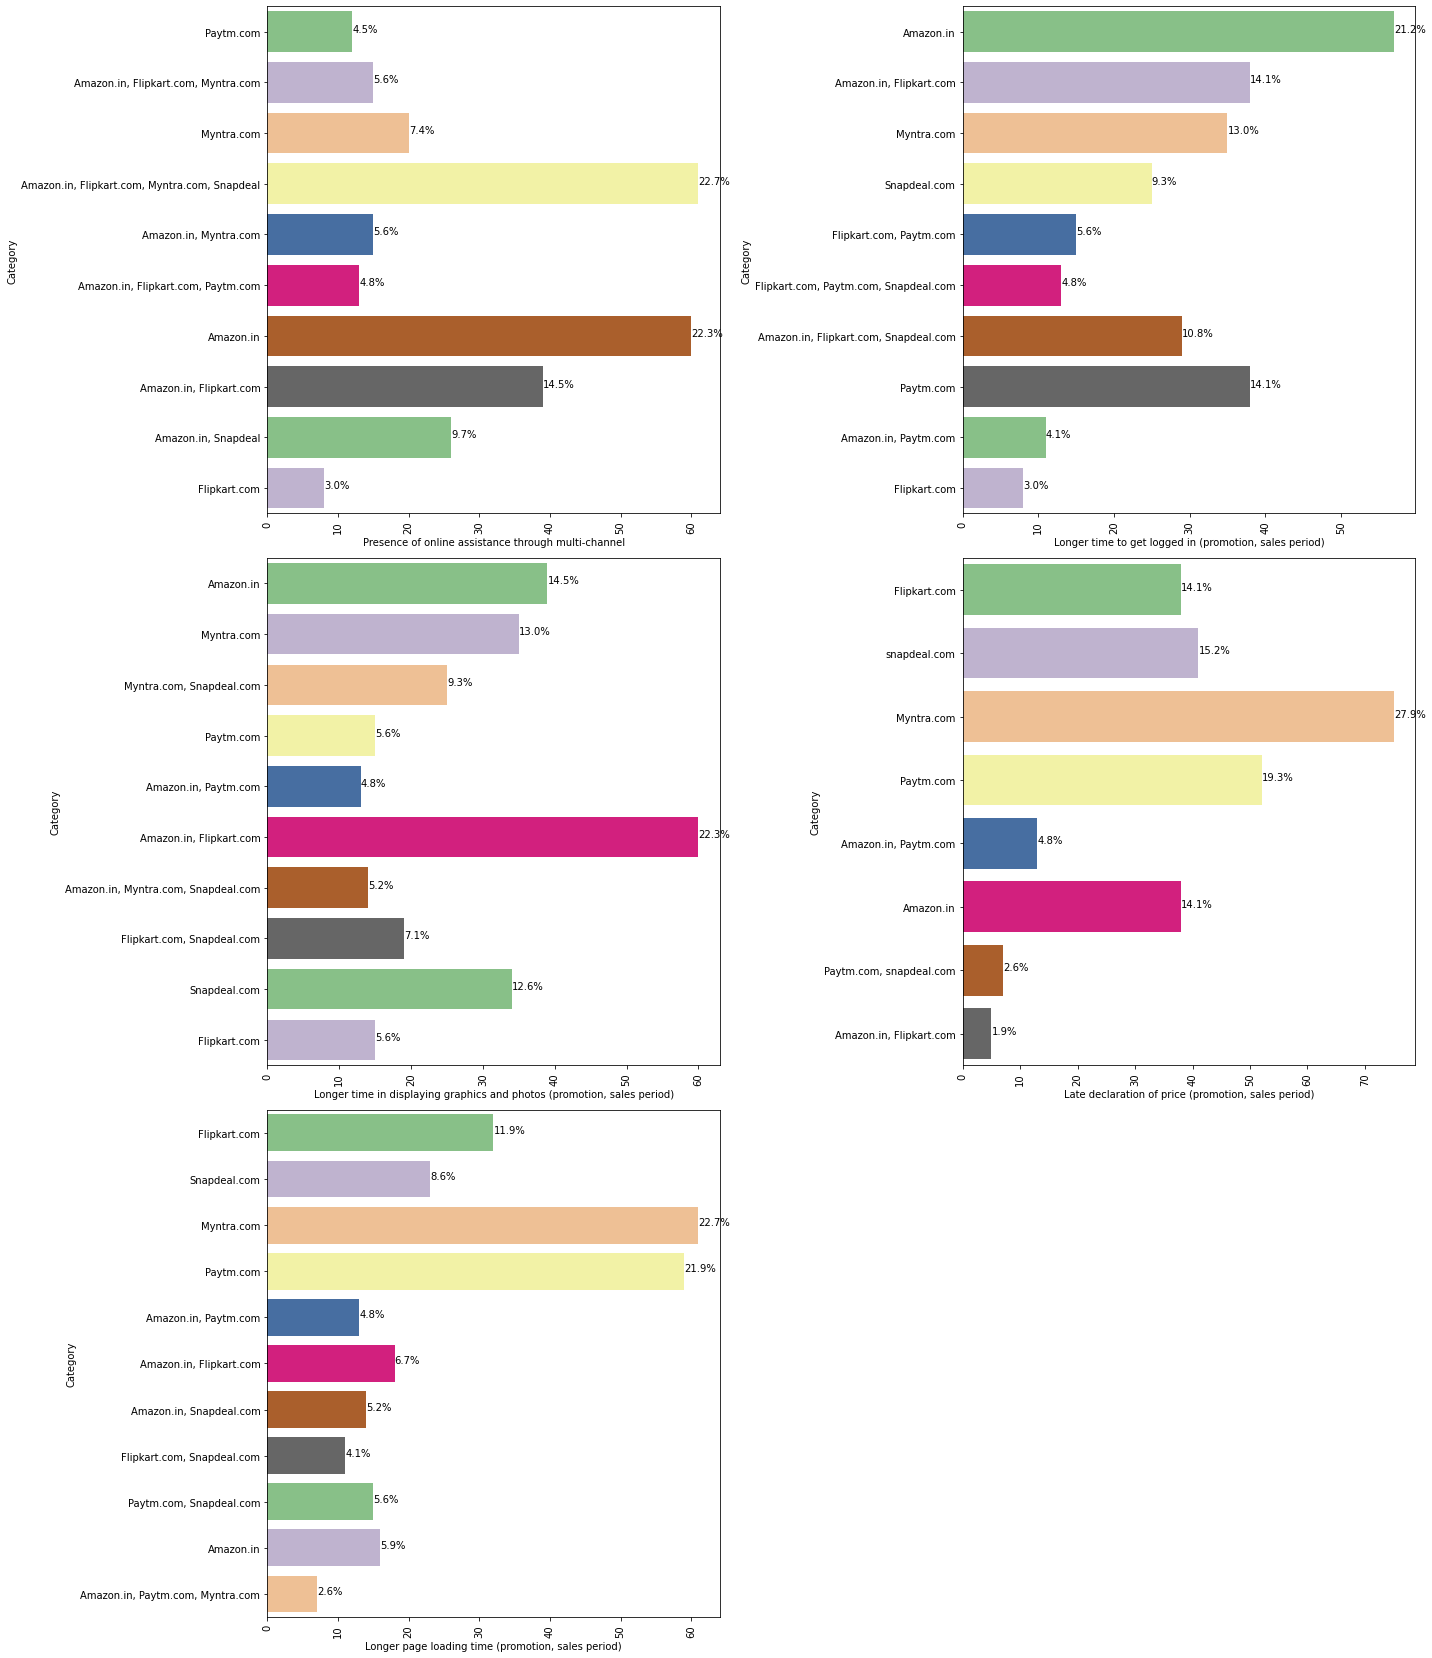

In [41]:
plt.figure(figsize=(20,38))
c=1
for i in df.columns[60:65]:
    plt.subplot(5,2,c)
    c=c+1
    ax = sns.countplot(y = df[i],palette='Accent')
    plt.xticks(rotation=90)
    plt.xlabel(i)
    plt.ylabel('Category')
    
    total = len(df[i])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
    
        plt.tight_layout()

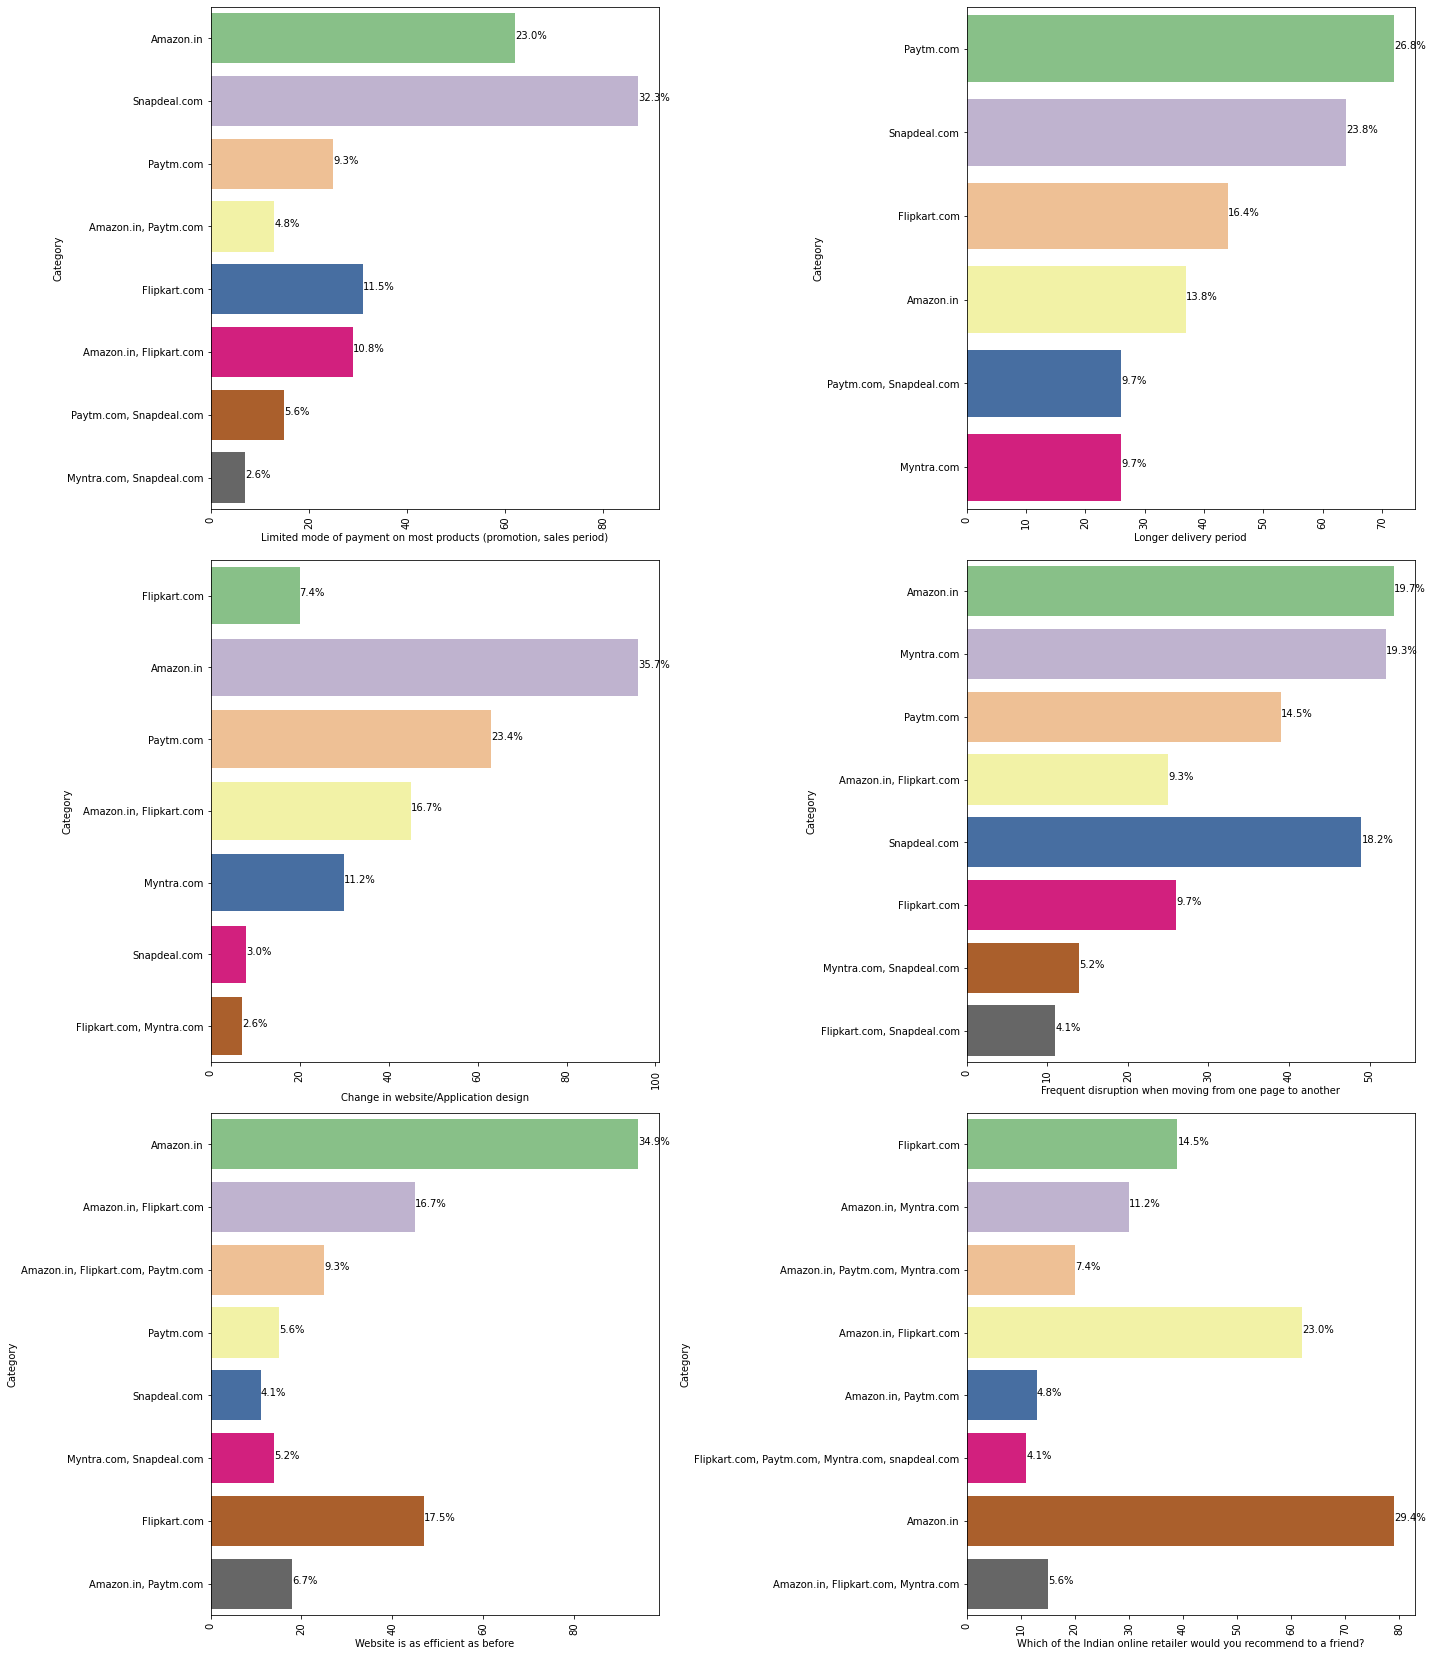

In [42]:
plt.figure(figsize=(20,38))
c=1
for i in df.columns[65:72]:
    plt.subplot(5,2,c)
    c=c+1
    ax = sns.countplot(y = df[i],palette='Accent')
    plt.xticks(rotation=90)
    plt.xlabel(i)
    plt.ylabel('Category')
    
    total = len(df[i])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
    
        plt.tight_layout()

In [44]:
df['recommend_amazon'] = df['Which of the Indian online retailer would you recommend to a friend?'].apply(lambda x :1 if (x.lower().find('amazon.in') >=0) else 0  )

df['recommend_flipkart'] = df['Which of the Indian online retailer would you recommend to a friend?'].apply(lambda x :1 if (x.lower().find('flipkart') >=0) else 0  )

df['recommend_myntra'] = df['Which of the Indian online retailer would you recommend to a friend?'].apply(lambda x :1 if (x.lower().find('myntra') >=0) else 0  )

df['recommend_paytm'] = df['Which of the Indian online retailer would you recommend to a friend?'].apply(lambda x :1 if (x.lower().find('paytm') >=0) else 0  )

df['recommend_snapdeal'] = df['Which of the Indian online retailer would you recommend to a friend?'].apply(lambda x :1 if (x.lower().find('snapdeal') >=0) else 0 ) 


In [45]:
df[0:10]

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?,recommend_amazon,recommend_flipkart,recommend_myntra,recommend_paytm,recommend_snapdeal
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com,0,1,0,0,0
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com",1,0,1,0,0
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com",1,0,1,1,0
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com",1,1,0,0,0
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com",1,0,1,0,0
5,Female,31-40 years,Noida,201308,Above 4 years,41 times and above,Wi-Fi,Smartphone,5.5 inches,Android,...,Flipkart.com,Paytm.com,Flipkart.com,Amazon.in,"Amazon.in, Paytm.com",1,0,0,1,0
6,Male,41-50 yaers,Delhi,110011,Above 4 years,31-40 times,Wi-Fi,Tablet,Others,Android,...,Snapdeal.com,Myntra.com,Myntra.com,Snapdeal.com,"Flipkart.com, Paytm.com, Myntra.com, snapdeal.com",0,1,1,1,1
7,Male,41-50 yaers,Delhi,110018,3-4 years,Less than 10 times,Mobile Internet,Desktop,Others,Window/windows Mobile,...,Flipkart.com,Amazon.in,Amazon.in,Amazon.in,Amazon.in,1,0,0,0,0
8,Female,Less than 20 years,Solan,173229,2-3 years,Less than 10 times,Wi-Fi,Smartphone,5.5 inches,Android,...,Amazon.in,Amazon.in,"Myntra.com, Snapdeal.com","Myntra.com, Snapdeal.com",Amazon.in,1,0,0,0,0
9,Female,31-40 years,Delhi,110039,Less than 1 year,Less than 10 times,Wi-Fi,Laptop,Others,Window/windows Mobile,...,Snapdeal.com,Myntra.com,Myntra.com,Flipkart.com,Flipkart.com,0,1,0,0,0


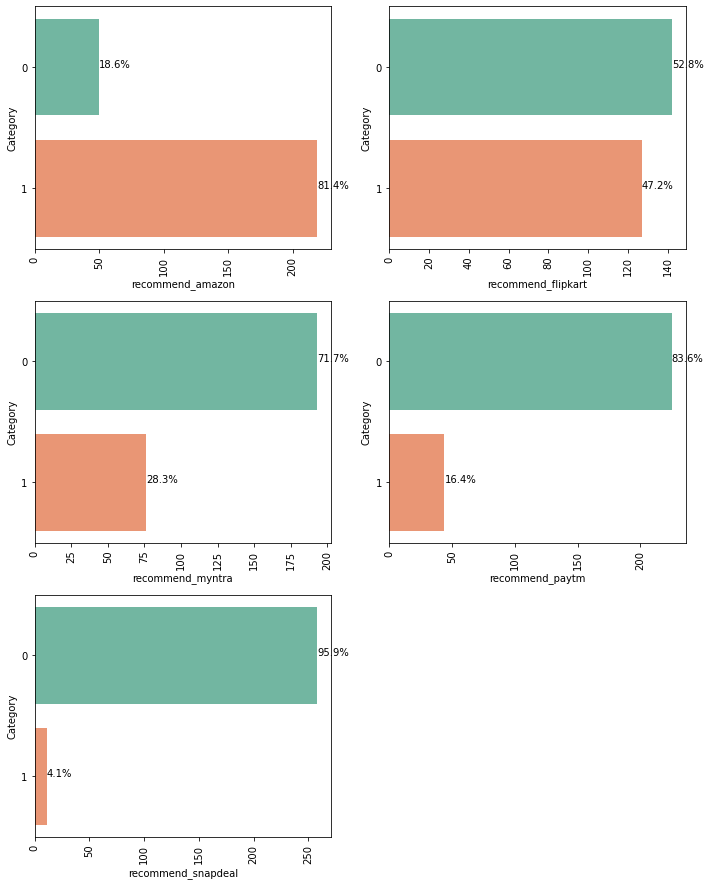

In [46]:
plt.figure(figsize=(10,20))
c=1
for i in df.columns[71:]:
    plt.subplot(5,2,c)
    c=c+1
    ax = sns.countplot(y = df[i],palette='Set2')
    plt.xticks(rotation=90)
    plt.xlabel(i)
    plt.ylabel('Category')
    
    total = len(df[i])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
    
plt.tight_layout()

<AxesSubplot:>

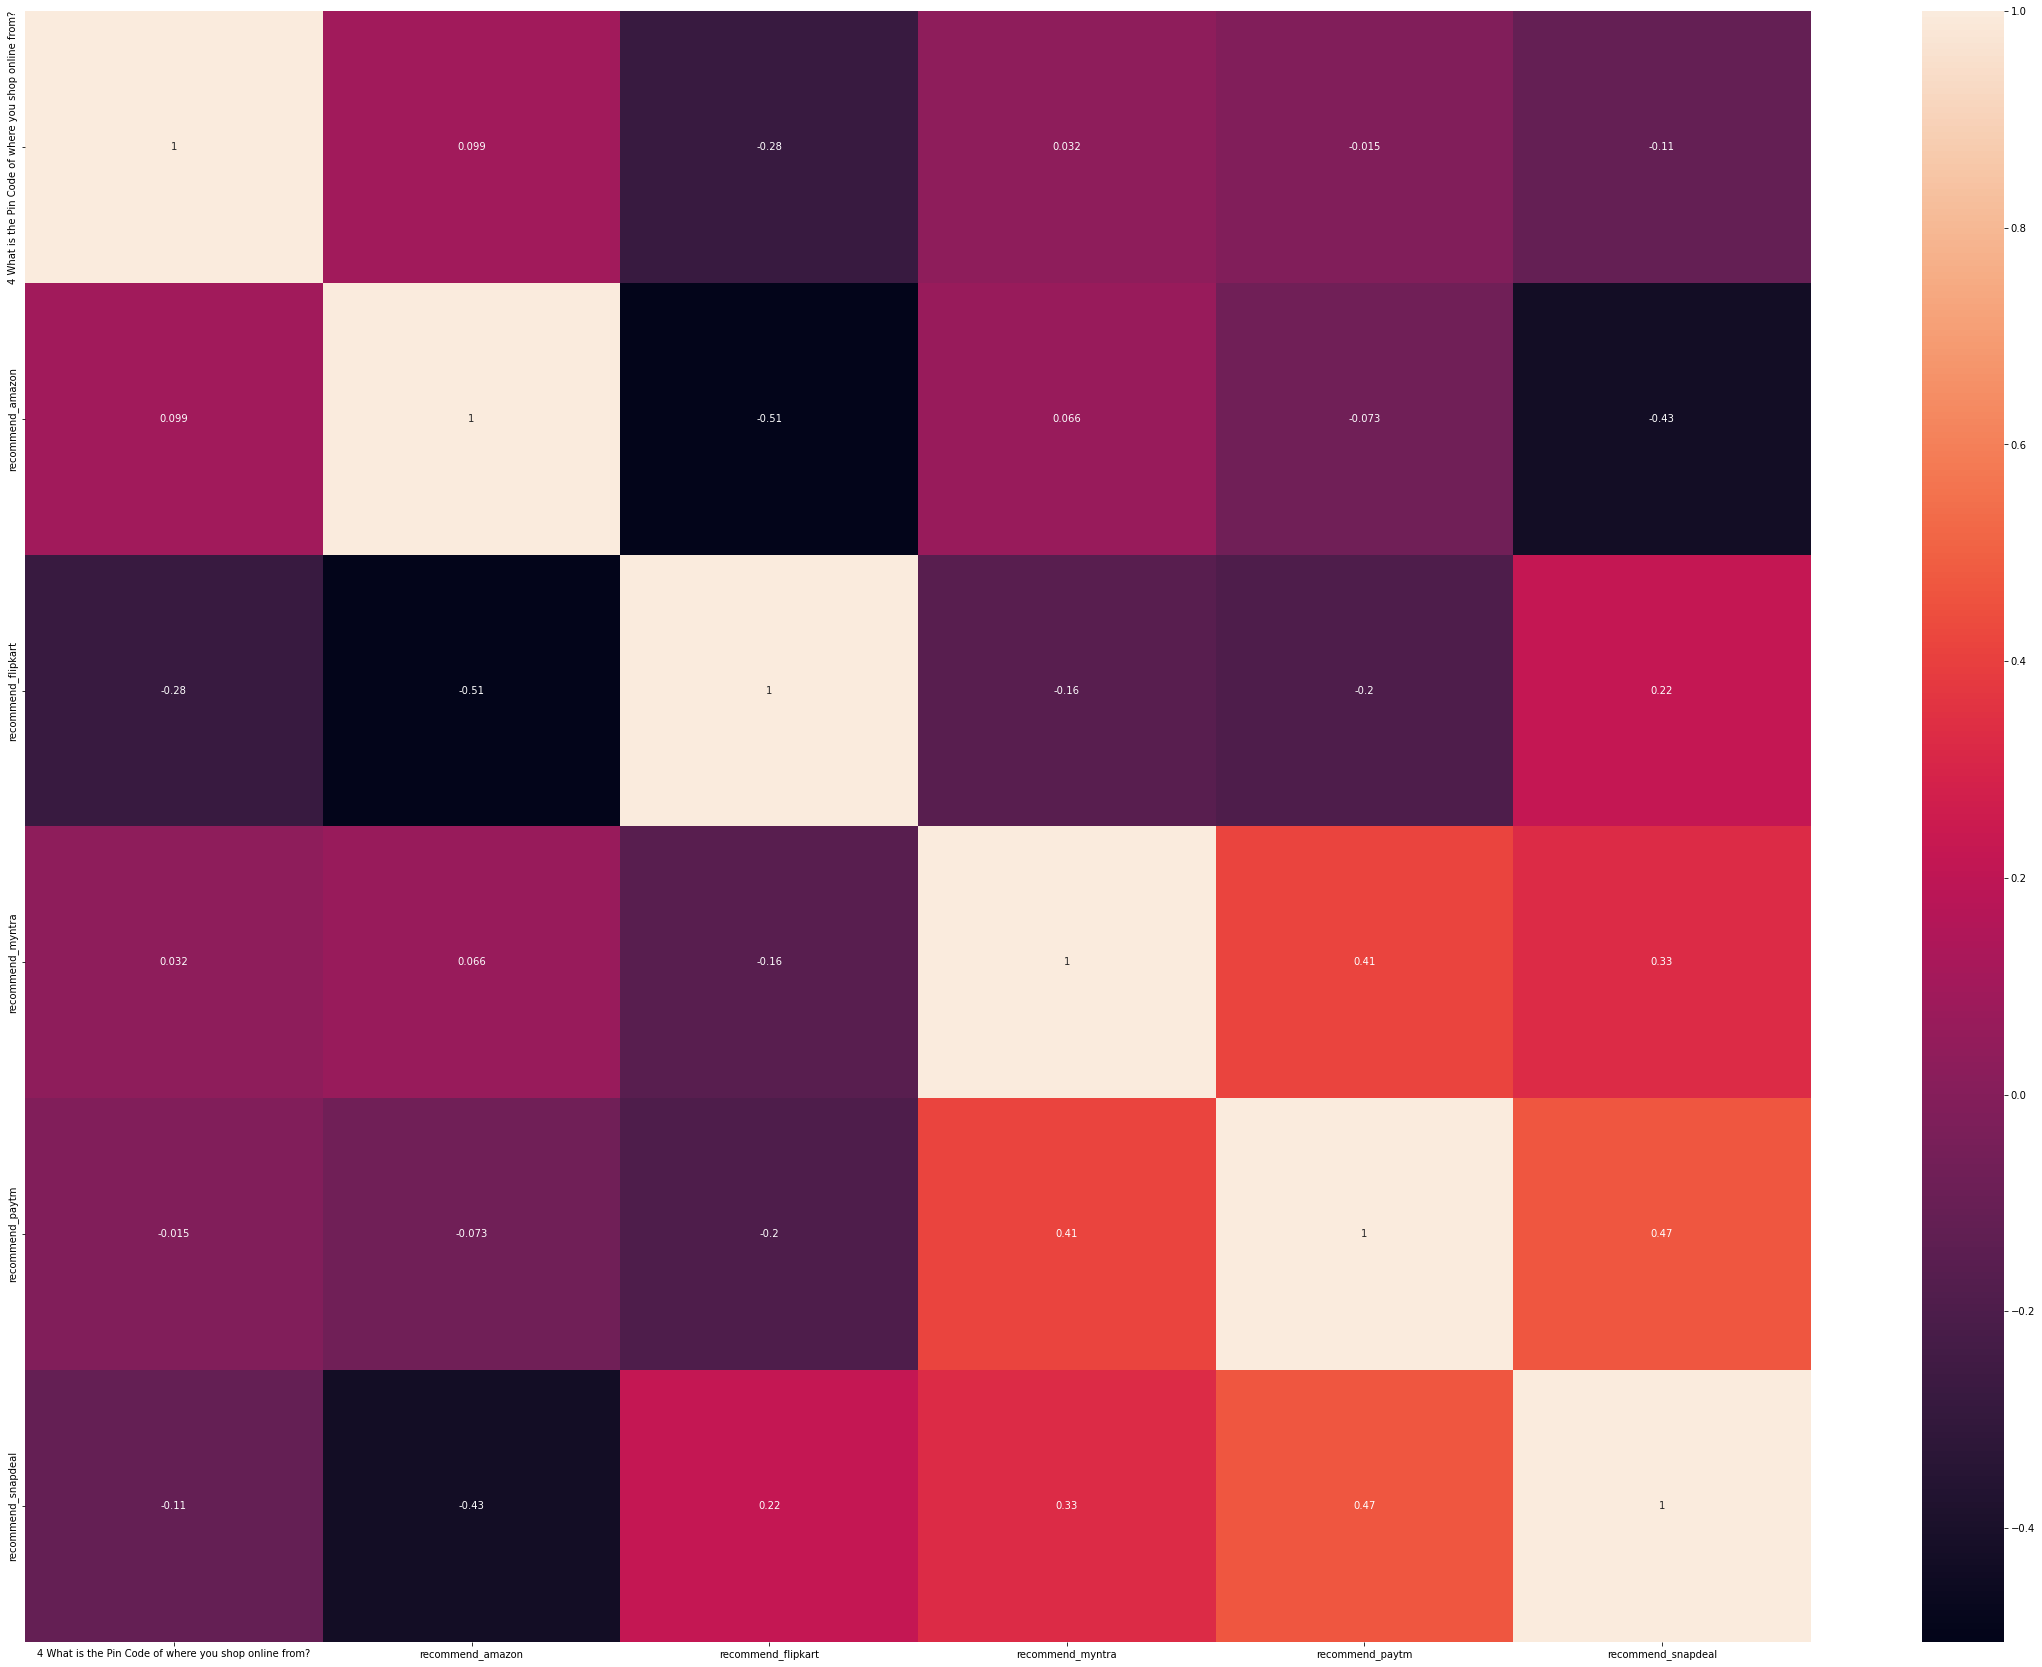

In [47]:
plt.figure(figsize=(40,30))
sns.heatmap(df.corr(),annot=True)

# Conculsion:
Amazon is recoomeded by 81.4% of of the customers.

Snapdeal is recommended by 4.1% of the customers.

Flipkart is recommed by 47.2 of the customers.

Myntra is recommended by 28% of the customers.

Paytm is recommeded by 16% of the customers